In [3]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 03: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Jose Usuga Giraldo
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [4]:
# A

def taylor_sin(x, n_terms=10):
  result = 0.0
  for i in range(n_terms):
    term = (-1)**i * (x**(2*i + 1)) / math.factorial(2*i + 1)
    result += term

  return result


In [5]:
#B
x = np.float32(math.pi / 4)
epsilon = np.finfo(np.float32).eps
n_terms = 0
approx_sin = 0.0

while True:
  n_terms += 1
  approx_sin = taylor_sin(x, n_terms)
  error = abs(approx_sin - math.sin(x))
  if error < epsilon:
    break

print(f"Número de términos para la convergencia (float32): {n_terms}")

Número de términos para la convergencia (float32): 5


In [6]:
# Define x as float64
x = math.pi / 4

# Machine epsilon for float64
epsilon = np.finfo(float).eps

# Find the number of terms for convergence
n_terms = 0
approx_sin = 0.0
while True:
  n_terms += 1
  approx_sin = taylor_sin(x, n_terms)
  error = abs(approx_sin - math.sin(x))
  if error < epsilon:
    break

print(f"Number of terms for convergence (float64): {n_terms}")

Number of terms for convergence (float64): 8


In [9]:

x_32 = np.float32(math.pi / 4)
epsilon_32 = np.finfo(np.float32).eps
n_terms_32 = 0
approx_sin_32 = 0.0

while True:
  n_terms_32 += 1
  approx_sin_32 = taylor_sin(x_32, n_terms_32)
  error_32 = abs(approx_sin_32 - math.sin(x_32))
  if error_32 < epsilon_32:
    break

percentage_error_32 = (error_32 / math.sin(x_32)) * 100

# --- float64 ---
x_64 = math.pi / 4
epsilon_64 = np.finfo(float).eps
n_terms_64 = 0
approx_sin_64 = 0.0

while True:
  n_terms_64 += 1
  approx_sin_64 = taylor_sin(x_64, n_terms_64)
  error_64 = abs(approx_sin_64 - math.sin(x_64))
  if error_64 < epsilon_64:
    break

percentage_error_64 = (error_64 / math.sin(x_64)) * 100

print(f"Error porcentual (float32): {percentage_error_32:.2e}%")
print(f"Error porcentual (float64): {percentage_error_64:.2e}%")

Error porcentual (float32): 2.48e-07%
Error porcentual (float64): 0.00e+00%


float64 es más preciso que float32, resultando en un error porcentual menor. float32 tiene un épsilon de máquina mayor, lo que afecta la convergencia y aumenta el error. La propagación de errores es mayor en float32 debido a su menor precisión. En resumen, float64 ofrece mayor precisión y menor error.

#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


In [10]:
def serie_exp(x, N):
    resultado = 0.0
    for n in range(N + 1):
        termino = (-1)**n * (x**n) / math.factorial(n)  # Usar math.factorial
        resultado += termino
    return resultado


x = 0.4

# Encontrar N
N = 0
while True:
    N += 1
    suma_actual = serie_exp(x, N)
    siguiente_termino = (-1)**(N + 1) * (x**(N + 1)) / math.factorial(N + 1)  # Usar math.factorial
    if abs(siguiente_termino) <= abs(10**-7 * suma_actual):
        break

# Calcular la serie y comparar con np.exp(-x)
resultado_serie = serie_exp(x, N)
resultado_numpy = np.exp(-x)

print(f"Valor calculado usando la serie (N = {N}): {resultado_serie}")
print(f"Valor usando np.exp(-x): {resultado_numpy}")


Valor calculado usando la serie (N = 7): 0.6703200304761903
Valor usando np.exp(-x): 0.6703200460356393


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

In [11]:
def terminos_serie_exp(x, N):
    terminos = []
    for n in range(N + 1):
        termino = (-1)**n * (x**n) / math.factorial(n)  # Usamos math.factorial
        terminos.append(termino)

    print("Términos de la serie:")
    for i, termino in enumerate(terminos):
        print(f"Término {i}: {termino}")

    # Imprimir los términos alrededor de n ≈ x - 1
    n_cerca_x_menos_1 = int(round(x - 1))
    print(f"\nTérminos alrededor de n ≈ x - 1 ({n_cerca_x_menos_1}):")
    for i in range(max(0, n_cerca_x_menos_1 - 2), min(N + 1, n_cerca_x_menos_1 + 3)):
        print(f"Término {i}: {terminos[i]}")

# Parámetros
x = 10
N = 15  # Número de términos en la serie
terminos_serie_exp(x, N)


Términos de la serie:
Término 0: 1.0
Término 1: -10.0
Término 2: 50.0
Término 3: -166.66666666666666
Término 4: 416.6666666666667
Término 5: -833.3333333333334
Término 6: 1388.888888888889
Término 7: -1984.126984126984
Término 8: 2480.15873015873
Término 9: -2755.731922398589
Término 10: 2755.731922398589
Término 11: -2505.210838544172
Término 12: 2087.67569878681
Término 13: -1605.9043836821616
Término 14: 1147.0745597729724
Término 15: -764.7163731819817

Términos alrededor de n ≈ x - 1 (9):
Término 7: -1984.126984126984
Término 8: 2480.15873015873
Término 9: -2755.731922398589
Término 10: 2755.731922398589
Término 11: -2505.210838544172



c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.

In [12]:
def exp_series_inverse(x, N):
    """Calcula 1/e^x usando la serie de Taylor para e^x."""
    result = 0.0
    for n in range(N + 1):
        term = (x**n) / math.factorial(n)  # Usar la serie de e^x
        result += term
    return 1 / result  # Invertir el resultado para obtener e^-x

# Valor para x
x = 10.0

# Conjunto de tolerancia para la convergencia
tolerance = 1e-7

# Número de términos para la convergencia
N = 0
approx_exp = 0.0
while True:
    N += 1
    approx_exp = exp_series_inverse(x, N)
    error = abs(approx_exp - np.exp(-x))
    if error < tolerance:
        break

print(f"Número de términos para la convergencia (x ≈ 10): {N}")
print(f"Valor calculado: {approx_exp}")
print(f"Valor esperado (np.exp(-x)): {np.exp(-x)}")

Número de términos para la convergencia (x ≈ 10): 20
Valor calculado: 4.547215139175042e-05
Valor esperado (np.exp(-x)): 4.5399929762484854e-05


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


In [13]:
def serie_exp(x, N):
    resultado = 0.0
    for n in range(N + 1):
        termino = (-1)**n * (x**n) / math.factorial(n)
        resultado += termino
    return resultado
N = 20
tolerancia = 1e-7
valores_x = list(range(1, 11)) + list(range(10, 101, 10))

#para evaluar la precisión
def evaluar_convergencia():
    print(f"{'x':<10} {'Aproximación':<20} {'np.exp(-x)':<20} {'Error':<20} {'Convergencia':<10}")
    print("-" * 80)

    for x in valores_x:
        aproximacion = serie_exp(x, N)
        valor_real = np.exp(-x)
        error = abs(aproximacion - valor_real)

        # Determinar si cumple la tolerancia
        convergencia = "Sí" if error < tolerancia else "No"

        # Imprimir resultados
        print(f"{x:<10} {aproximacion:<20} {valor_real:<20} {error:<20} {convergencia:<10}")

# Ejecutar la evaluación
evaluar_convergencia()


x          Aproximación         np.exp(-x)           Error                Convergencia
--------------------------------------------------------------------------------
1          0.36787944117144245  0.36787944117144233  1.1102230246251565e-16 Sí        
2          0.1353352832366504   0.1353352832366127   3.7692071686024065e-14 Sí        
3          0.04978706854792016  0.049787068367863944 1.8005621299499452e-10 Sí        
4          0.018315711651223532 0.01831563888873418  7.276248935317309e-08 Sí        
5          0.006745540097711817 0.006737946999085467 7.593098626350325e-06 No        
6          0.0028154200509777406 0.0024787521766663585 0.0003366678743113821 No        
7          0.009183673977218289 0.0009118819655545162 0.008271792011663772 No        
8          0.13229825662634914  0.00033546262790251185 0.13196279399844663  No        
9          1.5142101415414988   0.00012340980408667956 1.514086731737412    No        
10         13.396865995695713   4.5399929762484854e

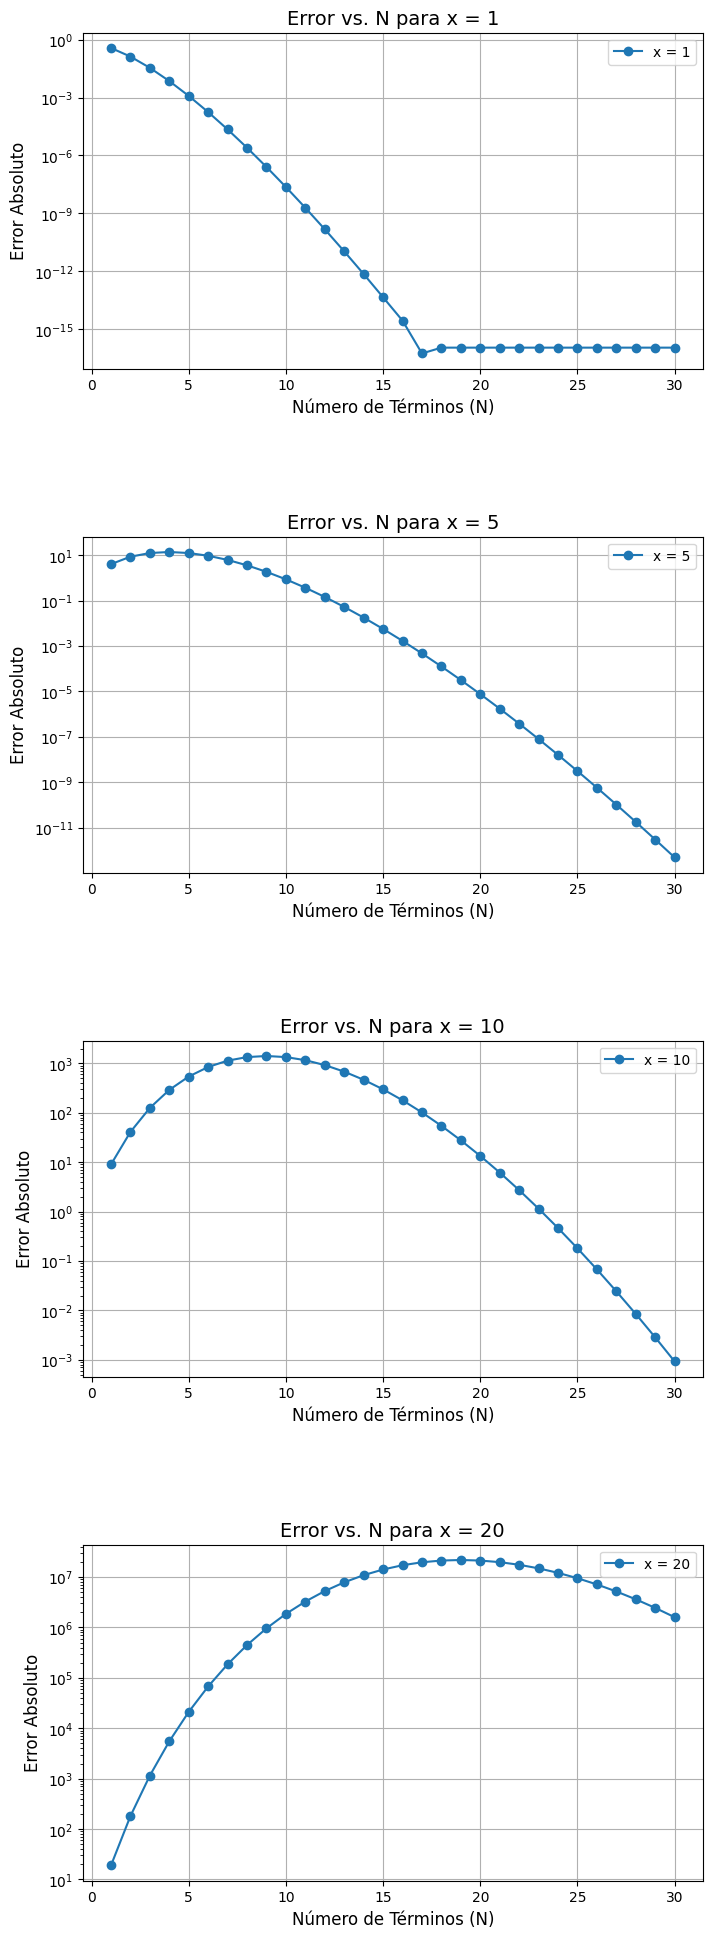

In [14]:

def serie_exp(x, N):
    """Calcula la serie de Taylor para e^-x."""
    resultado = 0.0
    for n in range(N + 1):
        termino = (-1)**n * (x**n) / math.factorial(n)
        resultado += termino
    return resultado

valores_x = [1, 5, 10, 20]

valores_N = range(1, 31)

fig, ejes = plt.subplots(len(valores_x), 1, figsize=(8, 6 * len(valores_x)))
fig.subplots_adjust(hspace=0.5)

# los valores de x y grafica los errores
for i, x in enumerate(valores_x):
    errores = []
    for N in valores_N:
        resultado_serie = serie_exp(x, N)
        resultado_numpy = np.exp(-x)
        error = abs(resultado_serie - resultado_numpy)
        errores.append(error)

    eje = ejes[i]
    eje.plot(valores_N, errores, label=f"x = {x}", marker="o")
    eje.set_title(f"Error vs. N para x = {x}", fontsize=14)
    eje.set_xlabel("Número de Términos (N)", fontsize=12)
    eje.set_ylabel("Error Absoluto", fontsize=12)
    eje.set_yscale("log")  # Escala logarítmica para el error
    eje.legend()
    eje.grid(True)

# Mostrar el gráfico
plt.show()


# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [ ]:
def S1_N(N): #suma S(1)_N = ∑ (−1)^n * n / (n + 1)
    suma = 0
    for n in range(1, 2 * N + 1):
        suma += (-1)**(n-1) * n / (n + 1)
    return suma

def S2_N(N): #Calcula la suma S(2)_N = -∑ impares + ∑ pares
    suma_impares = 0
    for n in range(1, N + 1):
        suma_impares += -(2 * n - 1) / (2 * n)

    suma_pares = 0
    for n in range(1, N + 1):
        suma_pares += (2 * n) / (2 * n + 1)

    return suma_impares + suma_pares

def S3_N(N): # S(3)_N = ∑ 1 / (2n * (2n + 1))
    suma = 0
    for n in range(1, N + 1):
        suma += 1 / (2 * n * (2 * n + 1))
    return suma


In [ ]:
N_valores = [10, 100, 1000, 10000, 100000]

for N in N_valores:
  s1 = S1_N(N)
  s2 = S2_N(N)
  s3 = S3_N(N)
  print(f"N = {N}: S1 = {s1:.6f}, S2 = {s2:.6f}, S3 = {s3:.6f}")

N = 10: S1 = -0.283610, S2 = 0.283610, S3 = 0.283610
N = 100: S1 = -0.304371, S2 = 0.304371, S3 = 0.304371
N = 1000: S1 = -0.306603, S2 = 0.306603, S3 = 0.306603
N = 10000: S1 = -0.306828, S2 = 0.306828, S3 = 0.306828
N = 100000: S1 = -0.306850, S2 = 0.306850, S3 = 0.306850


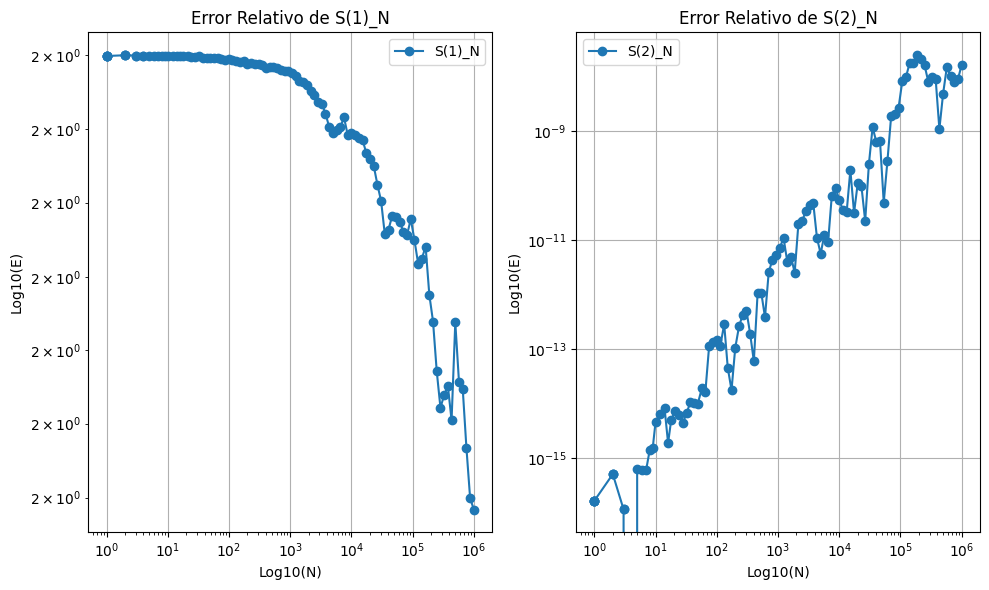

In [ ]:
N_valores = np.logspace(0, 6, num=100, dtype=int)  # 100 puntos entre 1 y 10^6

#Errores relativos para S1_N y S2_N
errores_S1 = []
errores_S2 = []

for N in N_valores:
    s1 = S1_N(N)
    s2 = S2_N(N)
    s3 = S3_N(N)  # Solución exact

    errores_S1.append(abs((s1 - s3) / s3))
    errores_S2.append(abs((s2 - s3) / s3))
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.loglog(N_valores, errores_S1, marker='o', linestyle='-', label='S(1)_N')
plt.title('Error Relativo de S(1)_N')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.loglog(N_valores, errores_S2, marker='o', linestyle='-', label='S(2)_N')
plt.title('Error Relativo de S(2)_N')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Los resultados demuestran claramente el impacto de la cancelación sustractiva en la precisión numérica. Cuando se suman números con magnitudes similares pero signos opuestos, se pueden perder cifras significativas debido a errores de redondeo. Esto se ve especialmente en S(1)N, donde la cancelación sustractiva es más pronunciada.

Al separar la suma en términos pares e impares, como en S(2)N, se puede reducir la cancelación sustractiva y mejorar la precisión. Sin embargo, la mejor solución es evitar la cancelación sustractiva por completo mediante la manipulación analítica de la serie, como se hace en S(3)N.

En resumen, estos resultados resaltan la importancia de comprender y abordar la cancelación sustractiva al realizar cálculos numéricos, especialmente cuando se trata de series alternantes u operaciones que involucran la resta de números cercanos en magnitud. Siempre que sea posible, es preferible buscar métodos que eviten la cancelación sustractiva para obtener resultados más precisos.